In [36]:
import pandas as pd 

In [37]:
df = pd.read_csv(r'C:\Users\The Bridge\Desktop\ML\PANEM\Segundas_K2.csv')
df.head()


C:\Users\The Bridge\AppData\Local\Temp\ipykernel_31352\3357821082.py:1: DtypeWarning: Columns (3,4,5,8,9,13,14,15,16,17,18,19,20,21,22,23,30,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\The Bridge\Desktop\ML\PANEM\Segundas_K2.csv')


,Día,Fecha de operación,Hora de cierre,Semana,Movimiento PDV,Orden,Tipo de orden,Subtipo de orden,No. Mesa,No. Personas,...,IEPS.1,Total.1,Cortesías Subtotal,IVA.2,IEPS.2,Total.2,Anulaciones Subtotal,IVA.3,IEPS.3,Total.3
0,sábado,2023-04-01 00:00:00,2023-04-01 08:35:48.807000,13,35895,1,Restaurant,-,5.0,1,...,0.0,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sábado,2023-04-01 00:00:00,2023-04-01 08:35:48.807000,13,35895,1,Restaurant,-,5.0,1,...,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sábado,2023-04-01 00:00:00,2023-04-01 08:36:20.477000,13,35896,2,Restaurant,-,5.0,1,...,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sábado,2023-04-01 00:00:00,2023-04-01 08:36:20.477000,13,35896,2,Restaurant,-,5.0,1,...,0.0,229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sábado,2023-04-01 00:00:00,2023-04-01 08:36:20.477000,13,35896,2,Restaurant,-,5.0,1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape[0]

521916

In [38]:
df_agrupado = df.groupby('Movimiento PDV')['Platillo / Artículo'].apply(lambda x: ', '.join(x)).reset_index()


In [73]:
df_agrupado = df.groupby('Movimiento PDV')['Total.1'].apply(lambda x: ', '.join(x)).reset_index()

TypeError: sequence item 0: expected str instance, float found

In [40]:
df_agrupado.drop_duplicates()

,Movimiento PDV,Platillo / Artículo
0,1.0,"CONCHA CHOCOLATE, CONCHA CHOCOLATE, PIZZA PANE..."
1,2.0,"PIZZA PEPPERONI, COCA COLA, COCA COLA, COCA CO..."
2,3.0,"CONCHA VAINILLA, CAPPUCCINO 16OZ, CAPPUCCINO 1..."
3,4.0,"CHILAQUILES PANEM, CHILAQUILES PANEM, CHILAQUI..."
4,5.0,"PIZZA DIAVOLO, LIMONADA, LIMONADA, LIMONADA, L..."
...,...,...
104906,99612,"CROISSANT DE JAMÓN Y QUESO, CAFE REFILL, CAFE ..."
104907,99613,"REBANADA SACHER, ROL DE CANELA, CAPPUCCINO 8OZ..."
104908,99614,"CHAI EN LAS ROCAS, CHAI EN LAS ROCAS, ENCHILAD..."
104909,99615,HAM CHEESE SANDWICH ROLL


In [57]:
df_agrupado = df.groupby('Movimiento PDV')['Platillo / Artículo'].apply(lambda x: ', '.join(sorted(x))).reset_index()

# Contar las combinaciones de artículos y ordenar por frecuencia
combinaciones_frecuentes = df_agrupado['Platillo / Artículo'].value_counts().reset_index()
combinaciones_frecuentes.columns = ['Combinación de Artículos', 'Frecuencia']

# Mostrar el DataFrame resultante
print(combinaciones_frecuentes)

                                Combinación de Artículos  Frecuencia
0                               CAFE REFILL, CAFE REFILL        1464
1                                       CAFE OLLA REFILL        1272
2                                   COCA COLA, COCA COLA         838
3                            REBANADA CHEESECAKE TORTUGA         531
4                         AGUA NATURA ST, AGUA NATURA ST         479
...                                                  ...         ...
51651  CAPPUCCINO FRAPPE, CAPPUCCINO FRAPPE, CROISSAN...           1
51652  CLUB SANDWICH, CROISSANT DE JAMÓN Y QUESO, JUG...           1
51653  JUGO NARANJA, JUGO TROPICAL, PIZZA 4 QUESOS, T...           1
51654  PIZZA 4 QUESOS, TARTALETA DE MORAS, TISANA FRI...           1
51655                                Platillo / Artículo           1

[51656 rows x 2 columns]


In [62]:
combinaciones_frecuentes["Combinación de Artículos"].unique()

array(['CAFE REFILL, CAFE REFILL', 'CAFE OLLA REFILL',
       'COCA COLA, COCA COLA', ...,
       'JUGO NARANJA, JUGO TROPICAL, PIZZA 4 QUESOS, TARTALETA DE NUEZ',
       'PIZZA 4 QUESOS, TARTALETA DE MORAS, TISANA FRIA GINGER ALE, TISANA FRIA GINGER ALE, TISANA FRIA GINGER ALE, TISANA FRIA POP, TISANA FRIA POP, TISANA FRIA POP',
       'Platillo / Artículo'], dtype=object)

In [55]:
df_agrupado["Platillo / Artículo"].value_counts()

Platillo / Artículo
CAFE REFILL, CAFE REFILL                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [70]:


# Agrupar por 'Movimiento PDV' y obtener los artículos en cada ticket
agrupado = df.groupby('Movimiento PDV')['Platillo / Artículo'].apply(list)

# Crear una lista de todas las combinaciones de artículos en cada ticket
combinaciones = []
for items in agrupado:
    if len(items) > 1:
        combinaciones.extend(combinations(sorted(items), 2))

# Contar la frecuencia de cada combinación asegurando el orden
combinaciones_contador = Counter(combinaciones)

# Crear una lista de todos los artículos únicos
articulos_unicos = list(set(df['Platillo / Artículo']))

# Crear una matriz de co-ocurrencia
co_ocurrencia = pd.DataFrame(0, index=articulos_unicos, columns=articulos_unicos)
for (articulo1, articulo2), count in combinaciones_contador.items():
    co_ocurrencia.at[articulo1, articulo2] = count
    co_ocurrencia.at[articulo2, articulo1] = count

# Convertir la matriz a una lista de pares y sus frecuencias
pares_frecuentes = [(articulo1, articulo2, co_ocurrencia.at[articulo1, articulo2]) 
                    for articulo1 in articulos_unicos 
                    for articulo2 in articulos_unicos 
                    if articulo1 != articulo2 and co_ocurrencia.at[articulo1, articulo2] > 0]

# Ordenar los pares por frecuencia en orden descendente
pares_frecuentes_ordenados = sorted(pares_frecuentes, key=lambda x: x[2], reverse=True)

# Mostrar los pares más frecuentes
print("Pares de artículos más frecuentemente pedidos juntos:")
for articulo1, articulo2, frecuencia in pares_frecuentes_ordenados:
    print(f"{articulo1} y {articulo2}: {frecuencia} veces")



Pares de artículos más frecuentemente pedidos juntos:
CHILAQUILES PANEM y CAFE REFILL: 37969 veces
CAFE REFILL y CHILAQUILES PANEM: 37969 veces
CHILAQUILES PANEM y CAPPUCCINO 16OZ: 19032 veces
CAPPUCCINO 16OZ y CHILAQUILES PANEM: 19032 veces
CHILAQUILES PANEM y COCA COLA: 17510 veces
COCA COLA y CHILAQUILES PANEM: 17510 veces
CHILAQUILES PANEM y CAFE OLLA REFILL: 16514 veces
CAFE OLLA REFILL y CHILAQUILES PANEM: 16514 veces
CHILAQUILES PANEM y LIMONADA: 13356 veces
LIMONADA y CHILAQUILES PANEM: 13356 veces
JUGO NARANJA y CHILAQUILES PANEM: 12888 veces
CHILAQUILES PANEM y JUGO NARANJA: 12888 veces
CHILAQUILES PANEM y LATTE 16OZ: 9961 veces
LATTE 16OZ y CHILAQUILES PANEM: 9961 veces
AGUA NATURA ST y AGUA: 9490 veces
AGUA y AGUA NATURA ST: 9490 veces
CHILAQUILES PANEM y ENCHILADAS SUIZAS: 9342 veces
ENCHILADAS SUIZAS y CHILAQUILES PANEM: 9342 veces
CROISSANT ALMENDRAS y OREO FRAPPE: 8785 veces
OREO FRAPPE y CROISSANT ALMENDRAS: 8785 veces
OREO FRAPPE y LATTE 16OZ: 8358 veces
LATTE 16OZ y 

In [76]:
#Revisar si hay valores nulos o no strings en la columna de artículos y manejar estos casos
df_agrupado['Platillo / Artículo'] = df_agrupado['Platillo / Artículo'].astype(str)  # Convertir todo a string para asegurar compatibilidad

#Filtrar nuevamente para movimientos de PDV con más de un artículo
data_filtered = df_agrupado[df_agrupado['Platillo / Artículo'].str.contains(',')]

#Crear combinaciones únicas de diferentes artículos en cada movimiento, asegurando que son strings
article_pairs_corrected = data_filtered['Platillo / Artículo'].apply(
    lambda x: list(combinations(sorted(set([item.strip() for item in x.split(',')])), 2))
)

#Aplanar la lista de todas las parejas para contarlas
flat_pairs_corrected = [pair for sublist in article_pairs_corrected for pair in sublist]
pair_counts_corrected = Counter(flat_pairs_corrected)

#Obtener las parejas más comunes
most_common_pairs_corrected = pair_counts_corrected.most_common(10)  # Mostrar las top 10 parejas más comunes
most_common_pairs_corrected


[(('CAFE REFILL', 'CHILAQUILES PANEM'), 4063),
 (('CAFE OLLA REFILL', 'CHILAQUILES PANEM'), 3645),
 (('CHILAQUILES PANEM', 'JUGO NARANJA'), 2806),
 (('CHILAQUILES PANEM', 'ENCHILADAS SUIZAS'), 2389),
 (('CHILAQUILES PANEM', 'LIMONADA'), 2135),
 (('CAFE OLLA REFILL', 'CAFE REFILL'), 2035),
 (('ENCHILADAS SUIZAS', 'LIMONADA'), 2022),
 (('CAFE REFILL', 'ENCHILADAS SUIZAS'), 1906),
 (('AGUA', 'AGUA NATURA ST'), 1863),
 (('CAFE OLLA REFILL', 'ENCHILADAS SUIZAS'), 1810)]

In [74]:
co_ocurrencia

,PAN DE MUERTO AMORINO,ALFAJOR,QUESO,CUBREBOCAS,BROWNIE,SANDWITCH ENSALADA POLLO,MINI PIZZA DEL DIA,TISANA FRIA GINGER ALE,REEMPLAZO DE PAN A CROISSANT,JUGO VERDE,...,CROISSANT DE SALMÓN,CAFÉ ZEN,PIZZA JAMON SERRANO RAPPI,CAFE OLLA REFILL,SOURDOUGH,VASO LECHE,BISQUET,CAJA 10 CONCHAS,OREJA DE CHOCOLATE RAPPI,Chocolate TEOCAO regular
PAN DE MUERTO AMORINO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ALFAJOR,0,157,1,5,30,19,0,7,0,17,...,9,0,0,192,0,8,26,2,0,0
QUESO,0,1,38,0,1,2,0,0,0,5,...,0,0,0,11,1,1,1,0,0,0
CUBREBOCAS,0,5,0,48,1,3,0,2,0,2,...,0,0,0,24,0,0,0,0,0,2
BROWNIE,0,30,1,1,56,11,1,12,0,21,...,10,0,0,196,0,5,7,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VASO LECHE,0,8,1,0,5,0,1,6,0,20,...,5,0,0,65,0,23,34,0,0,0
BISQUET,0,26,1,0,7,9,0,8,0,27,...,9,0,0,160,1,34,1266,16,0,0
CAJA 10 CONCHAS,0,2,0,0,8,0,0,4,0,0,...,0,0,0,36,2,0,16,217,0,4
OREJA DE CHOCOLATE RAPPI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Pares de artículos más frecuentemente pedidos juntos:
CHILAQUILES PANEM y CAFE REFILL: 37969 veces
CAFE REFILL y CHILAQUILES PANEM: 37969 veces
CHILAQUILES PANEM y CAPPUCCINO 16OZ: 19032 veces
CAPPUCCINO 16OZ y CHILAQUILES PANEM: 19032 veces
CHILAQUILES PANEM y COCA COLA: 17510 veces
COCA COLA y CHILAQUILES PANEM: 17510 veces
CHILAQUILES PANEM y CAFE OLLA REFILL: 16514 veces
CAFE OLLA REFILL y CHILAQUILES PANEM: 16514 veces
CHILAQUILES PANEM y LIMONADA: 13356 veces
LIMONADA y CHILAQUILES PANEM: 13356 veces
JUGO NARANJA y CHILAQUILES PANEM: 12888 veces
CHILAQUILES PANEM y JUGO NARANJA: 12888 veces
CHILAQUILES PANEM y LATTE 16OZ: 9961 veces
LATTE 16OZ y CHILAQUILES PANEM: 9961 veces
AGUA NATURA ST y AGUA: 9490 veces
AGUA y AGUA NATURA ST: 9490 veces
CHILAQUILES PANEM y ENCHILADAS SUIZAS: 9342 veces
ENCHILADAS SUIZAS y CHILAQUILES PANEM: 9342 veces
CROISSANT ALMENDRAS y OREO FRAPPE: 8785 veces
OREO FRAPPE y CROISSANT ALMENDRAS: 8785 veces
OREO FRAPPE y LATTE 16OZ: 8358 veces
LATTE 16OZ y 

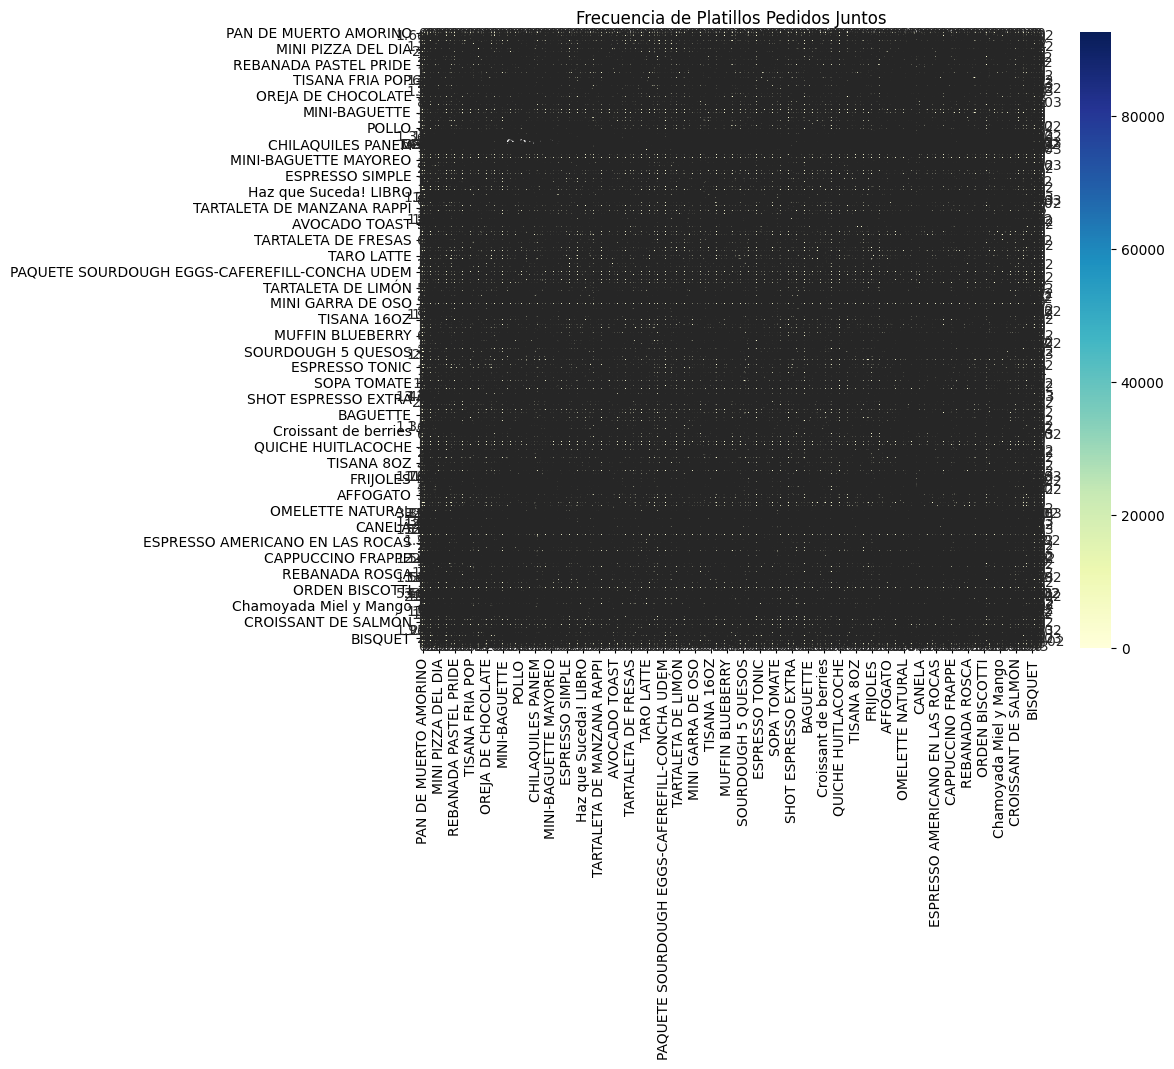

In [67]:
# Agrupar por 'Movimiento PDV' y obtener los artículos en cada ticket
agrupado = df.groupby('Movimiento PDV')['Platillo / Artículo'].apply(list)

# Crear una lista de todas las combinaciones de artículos en cada ticket
combinaciones = []
for items in agrupado:
    if len(items) > 1:
        combinaciones.extend(combinations(sorted(items), 2))

# Contar la frecuencia de cada combinación
combinaciones_contador = Counter(combinaciones)

# Crear una lista de todos los artículos únicos
articulos_unicos = list(set(df['Platillo / Artículo']))

# Crear una matriz de co-ocurrencia
co_ocurrencia = pd.DataFrame(0, index=articulos_unicos, columns=articulos_unicos)
for (articulo1, articulo2), count in combinaciones_contador.items():
    co_ocurrencia.at[articulo1, articulo2] = count
    co_ocurrencia.at[articulo2, articulo1] = count

# Convertir la matriz a una lista de pares y sus frecuencias
pares_frecuentes = [(articulo1, articulo2, co_ocurrencia.at[articulo1, articulo2]) 
                    for articulo1 in articulos_unicos 
                    for articulo2 in articulos_unicos 
                    if articulo1 != articulo2 and co_ocurrencia.at[articulo1, articulo2] > 0]

# Ordenar los pares por frecuencia en orden descendente
pares_frecuentes_ordenados = sorted(pares_frecuentes, key=lambda x: x[2], reverse=True)

# Mostrar los pares más frecuentes
print("Pares de artículos más frecuentemente pedidos juntos:")
for articulo1, articulo2, frecuencia in pares_frecuentes_ordenados:
    print(f"{articulo1} y {articulo2}: {frecuencia} veces")



                                Combinación de Artículos  Frecuencia
0                               CAFE REFILL, CAFE REFILL        1464
1                                       CAFE OLLA REFILL        1272
2                                   COCA COLA, COCA COLA         838
3                            REBANADA CHEESECAKE TORTUGA         531
4                         AGUA NATURA ST, AGUA NATURA ST         479
...                                                  ...         ...
57067  CHAI LATTE 16OZ, CHAI LATTE 16OZ, OREO FRAPPE,...           1
57068       CLUB SANDWICH, MOCHA 16OZ, MOCHA 16OZ, DANES           1
57069  MOCHA 16OZ, MOCHA 16OZ, CROISSANT ALMENDRAS, G...           1
57070  GARRA DE OSO, CROISSANT ALMENDRAS, ROL DE CANE...           1
57071                                Platillo / Artículo           1

[57072 rows x 2 columns]
                Combinación de Artículos  Frecuencia
0               CAFE REFILL, CAFE REFILL        1464
1                       CAFE OLLA REFILL

In [27]:
df["Platillo / Artículo"].value_counts()



Platillo / Artículo
CHILAQUILES PANEM                                55714
CAFE REFILL                                      40637
CAPPUCCINO 16OZ                                  26028
COCA COLA                                        20484
CAFE OLLA REFILL                                 17148
                                                 ...  
OREJA DE CHOCOLATE RAPPI                             1
PAQUETE SOURDOUGH EGGS-CAFEREFILL-CONCHA UDEM        1
TAPABOCAS                                            1
MINI GARRA DE OSO                                    1
PROMO AT                                             1
Name: count, Length: 231, dtype: int64

In [77]:
filtered_df_bebidas = df[df['Grupo'].isin(['CAFE Y  BEBIDAS CALIENTES', 'JUGOS Y BEBIDAS FRIAS'])]


In [78]:
filtered_df_bebidas.head()

filtered_df_bebidas.to_csv('QIN_segundas_bebidas.csv', index=False)